# Preparing and exploring iMAT transcriptomic integrated metabolic modeling datasets.

#### Downloading in data

In [1]:
import pandas as pd
df_dict = {}
for i in range(1,17):
    df_dict[f"integrated_df_{i}"] = pd.read_csv(f"https://raw.githubusercontent.com/JackWJW/LGG_Prognosis_Prediction/main/iMAT_integrated_data/TCGA_iMAT_integrated_df_{i}.csv")

Tidying data

In [2]:
cols_of_interest = ["DSS","DSS.time", 
                    'A4GALT','ABO','B3GALNT1','B3GALT1','B3GALT4','B3GALT5','B3GNT2','B3GNT3','B3GNT5',
                    'B4GALNT1','B4GALT5','B4GALT6','FUT1','FUT2','FUT3','FUT5','FUT6','FUT9','GAL3ST1',
                    'GCNT2','ST3GAL1','ST3GAL2','ST3GAL3','ST3GAL4','ST3GAL5','ST3GAL6','ST6GALNAC2',
                    'ST6GALNAC3','ST6GALNAC4','ST6GALNAC5','ST6GALNAC6','ST8SIA1','ST8SIA5','UGCG','UGT8',
                    'D-galactosyl-N-acylsphingosine','GA1','GA2','GD1a','GD1b','GD1c','GD2','GD3','GM1',
                    'GM1b','GM2','GM3','GQ1b','GQ1c','GT1a','GT1b','GT1c','GT2','GT3','fucosyl-galactosylgloboside',
                    'galactosylgloboside','globoside','globotriaosylceramide','lactoneotetraosylceramide','lc3Cer','lc4Cer',
                    'sialyl-3-paragloboside','sialyl-galactosylgloboside','sulfatide galactocerebroside','type I H glycolipid','type II H glycolipid',
                    '(neo)lacto-series','0-series(ganglio)','a-series(ganglio)','b-series(ganglio)','c-series(ganglio)','gal-series','globo-series']

tidied_dict = {}
n=0
for key, df in df_dict.items():
    n += 1
    df = df[df["primary disease or tissue"] == "Brain Lower Grade Glioma"]
    df = df[cols_of_interest]
    df = df.dropna()
    df = df.add_suffix(f"_{n}")
    tidied_dict[key] = df

Generating an averaged simulation dataframe

In [3]:
lipid_cols = ['D-galactosyl-N-acylsphingosine','GA1','GA2','GD1a','GD1b','GD1c','GD2','GD3','GM1',
                'GM1b','GM2','GM3','GQ1b','GQ1c','GT1a','GT1b','GT1c','GT2','GT3','fucosyl-galactosylgloboside',
                'galactosylgloboside','globoside','globotriaosylceramide','lactoneotetraosylceramide','lc3Cer','lc4Cer',
                'sialyl-3-paragloboside','sialyl-galactosylgloboside','sulfatide galactocerebroside','type I H glycolipid','type II H glycolipid',
                '(neo)lacto-series','0-series(ganglio)','a-series(ganglio)','b-series(ganglio)','c-series(ganglio)','gal-series','globo-series']

dataframe_list = list(tidied_dict.values())

combined_df = pd.concat(dataframe_list,axis=1)

for lipid in lipid_cols:
    lcs = []
    for x in range(1,17):
        lcs.append(f"{lipid}_{x}")
    combined_df[f"mean({lipid})"] = combined_df[lcs].mean(axis=1)

avg_cols = ['DSS_1',"DSS.time_1",'mean(D-galactosyl-N-acylsphingosine)','mean(GA1)','mean(GA2)','mean(GD1a)','mean(GD1b)',
            'mean(GD1c)','mean(GD2)','mean(GD3)','mean(GM1)','mean(GM1b)','mean(GM2)','mean(GM3)',
            'mean(GQ1b)','mean(GQ1c)','mean(GT1a)','mean(GT1b)','mean(GT1c)','mean(GT2)','mean(GT3)',
            'mean(fucosyl-galactosylgloboside)','mean(galactosylgloboside)','mean(globoside)','mean(globotriaosylceramide)','mean(lactoneotetraosylceramide)',
            'mean(lc3Cer)','mean(lc4Cer)','mean(sialyl-3-paragloboside)','mean(sialyl-galactosylgloboside)','mean(sulfatide galactocerebroside)','mean(type I H glycolipid)',
            'mean(type II H glycolipid)','mean((neo)lacto-series)','mean(0-series(ganglio))','mean(a-series(ganglio))','mean(b-series(ganglio))','mean(c-series(ganglio))',
            'mean(gal-series)','mean(globo-series)']
avg_df = combined_df[avg_cols]

Renaming DSS in each dataframe

In [4]:
import numpy as np
gene_list = ['A4GALT','ABO','B3GALNT1','B3GALT1','B3GALT4','B3GALT5','B3GNT2','B3GNT3','B3GNT5',
                    'B4GALNT1','B4GALT5','B4GALT6','FUT1','FUT2','FUT3','FUT5','FUT6','FUT9','GAL3ST1',
                    'GCNT2','ST3GAL1','ST3GAL2','ST3GAL3','ST3GAL4','ST3GAL5','ST3GAL6','ST6GALNAC2',
                    'ST6GALNAC3','ST6GALNAC4','ST6GALNAC5','ST6GALNAC6','ST8SIA1','ST8SIA5','UGCG','UGT8']

for x in range(2,17):
    for gene in gene_list:
        combined_df = combined_df.drop(columns=[f"{gene}_{x}"])
    combined_df = combined_df.drop(columns=[f"DSS_{x}",f"DSS.time_{x}"])

tidied_dict["combined_df"] = combined_df
tidied_dict["avg_df"] = avg_df

renamed_dict = {}
for keys, df in tidied_dict.items():
    for x in range(1,17):
        df = df.rename(columns={f"DSS_{x}":"DSS",f"DSS.time_{x}":"DSS.time"})
    df["S_temp"] = df["DSS"] * df["DSS.time"]
    df["Srv"] = ((df["S_temp"] >= 1) & (df["S_temp"] < (5*365))).astype(int)
    df = df.drop(columns=["S_temp"])
    renamed_dict[keys] = df

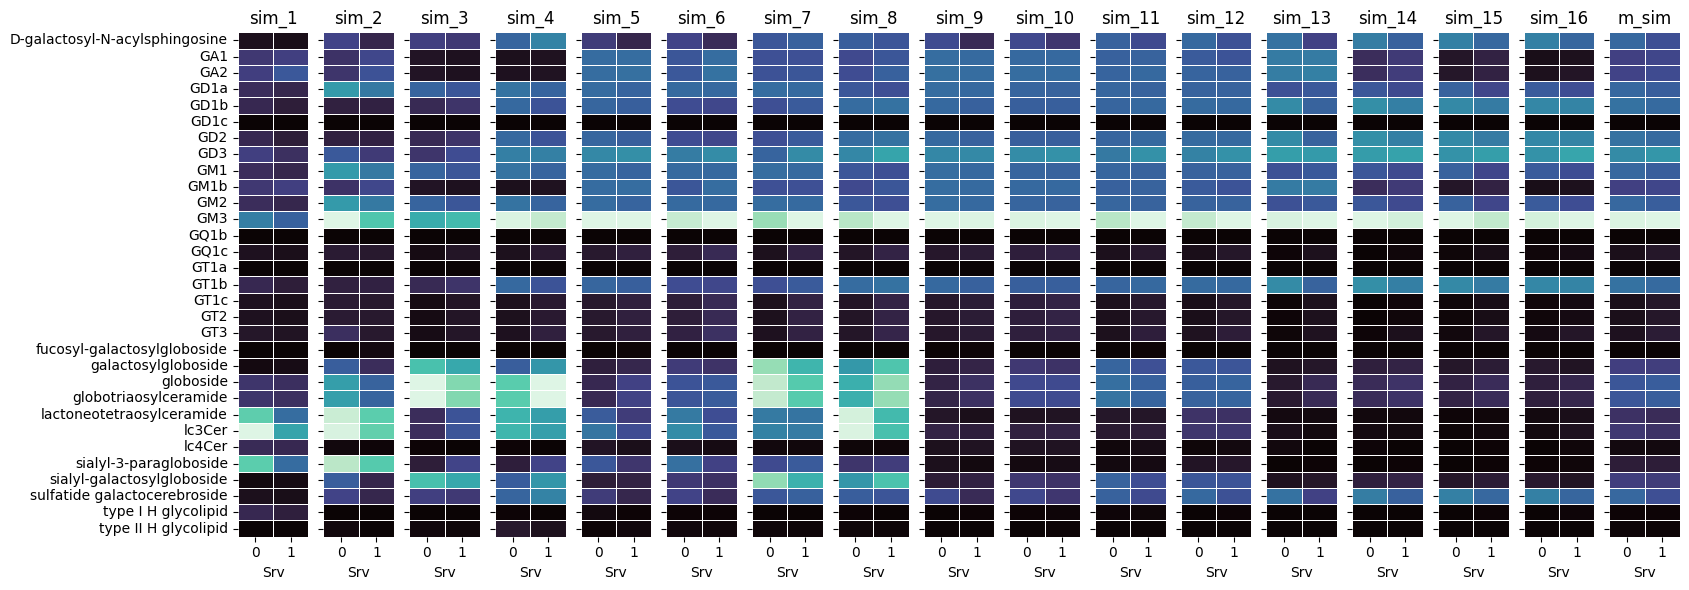

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plotting_dict = {}
for keys, df in renamed_dict.items():
    for gene in gene_list:
        drop_col = df.columns[df.columns.str.contains(gene)]
        df = df.drop(columns=drop_col)
    drop_col_2 = df.columns[df.columns.str.contains("series")]
    df = df.drop(columns=drop_col_2)
    drop_col_3 = df.columns[df.columns.str.contains("DSS")]
    df = df.drop(columns=drop_col_3)
    df.columns = df.columns.str.replace("_1","")
    plotting_dict[keys] = df


combined_df = plotting_dict.pop("combined_df")


num_dfs = len(plotting_dict)
fig, axes = plt.subplots(nrows=1, ncols=num_dfs, figsize=(1 * num_dfs, 6), squeeze=False) 

name_list = ["sim_1","sim_2","sim_3","sim_4","sim_5","sim_6","sim_7","sim_8","sim_9","sim_10","sim_11","sim_12","sim_13","sim_14","sim_15","sim_16","m_sim"]

for i, (name, df) in enumerate(plotting_dict.items()):
    ax = axes[0, i]
    sns.heatmap(df.groupby("Srv").mean().T, cmap='mako', ax=ax, cbar=False,linewidth=0.5)
    ax.set_title(name_list[i])
    ax.set_ylabel("") 
    if i > 0:
        ax.set_yticklabels([])

plt.tight_layout()
plt.show()

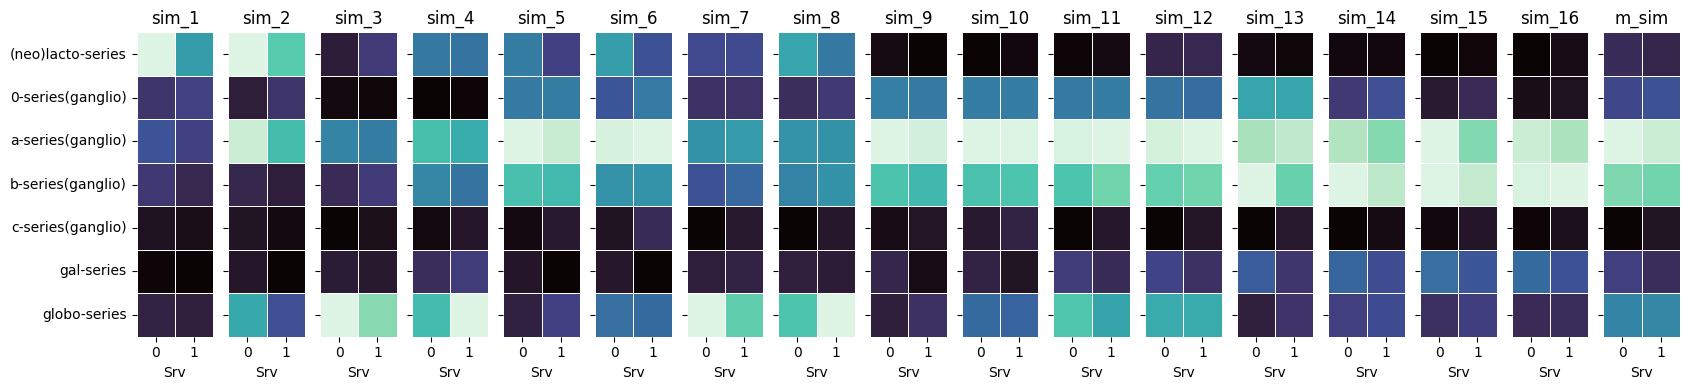

In [ ]:
plotting_2_dict = {}
for keys, df in renamed_dict.items():
    for gene in gene_list:
        drop_col = df.columns[df.columns.str.contains(gene)]
        df = df.drop(columns=drop_col)
    drop_col_3 = df.columns[df.columns.str.contains("DSS")]
    df = df.drop(columns=drop_col_3)
    df = df.filter(regex='series|Srv')
    df.columns = df.columns.str.replace("_1","")
    plotting_2_dict[keys] = df

plotting_2_dict.pop("combined_df")


num_dfs = len(plotting_2_dict)
fig, axes = plt.subplots(nrows=1, ncols=num_dfs, figsize=(1 * num_dfs, 4), squeeze=False)


name_list = ["sim_1","sim_2","sim_3","sim_4","sim_5","sim_6","sim_7","sim_8","sim_9","sim_10","sim_11","sim_12","sim_13","sim_14","sim_15","sim_16","m_sim"]

for i, (name, df) in enumerate(plotting_2_dict.items()):
    ax = axes[0, i]
    sns.heatmap(df.groupby("Srv").mean().T, cmap='mako', ax=ax, cbar=False,linewidth=0.5)
    ax.set_title(name_list[i])  
    ax.set_ylabel("")
    if i > 0:
        ax.set_yticklabels([]) 

plt.tight_layout()
plt.show()

In [134]:
grouped_dict = {}
i=0
for keys, df in renamed_dict.items():
    i += 1
    for gene in gene_list:
        drop_col = df.columns[df.columns.str.contains(gene)]
        df = df.drop(columns=drop_col)
    drop_col_2 = df.columns[df.columns.str.contains("series")]
    df = df.drop(columns=drop_col_2)
    drop_col_3 = df.columns[df.columns.str.contains("DSS")]
    df = df.drop(columns=drop_col_3)
    df = df.drop(columns=["Srv"])
    df.columns = df.columns.str.replace(r'_\d+$', '', regex=True)
    df["Simulation"] = i
    grouped_dict[keys] = df

grouped_dict.pop("avg_df")
grouped_dict.pop("combined_df")

sims_lipid_df = pd.concat(grouped_dict.values(),axis=0)

In [135]:
grouped_dict_2 = {}
i=0
for keys, df in renamed_dict.items():
    i += 1
    df = df.filter(regex='series|Srv').copy()
    df.columns = df.columns.str.replace(r'_\d+$', '', regex=True)
    df = df.drop(columns=["Srv"])
    df["Simulation"] = i
    grouped_dict_2[keys] = df

grouped_dict_2.pop("avg_df")
grouped_dict_2.pop("combined_df")

sims_series_df = pd.concat(grouped_dict_2.values(),axis=0)

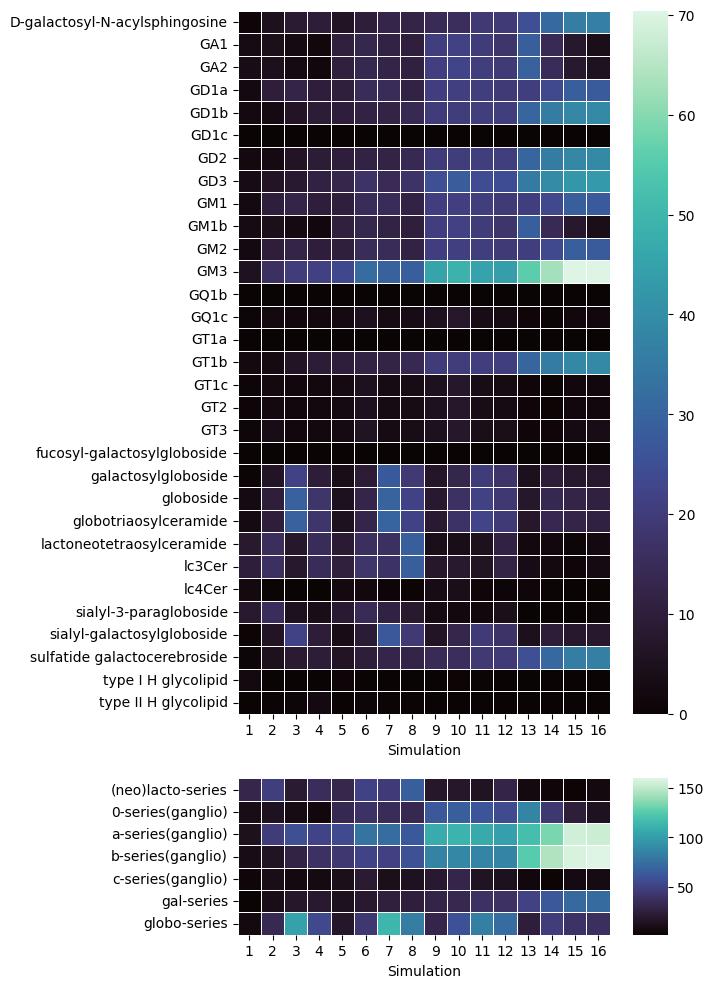

In [163]:
from matplotlib import gridspec
fig = plt.figure(figsize=(6,12))
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         hspace=0.15, height_ratios=[4.5, 1])
ax0 = fig.add_subplot(spec[0])
sns.heatmap(sims_lipid_df.groupby("Simulation").mean().T,cmap='mako',linewidth=0.5,ax=ax0)
ax1 = fig.add_subplot(spec[1])
sns.heatmap(sims_series_df.groupby("Simulation").mean().T,cmap='mako',linewidth=0.5,ax=ax1,cbar_kws={"aspect":4.5})

plt.show()

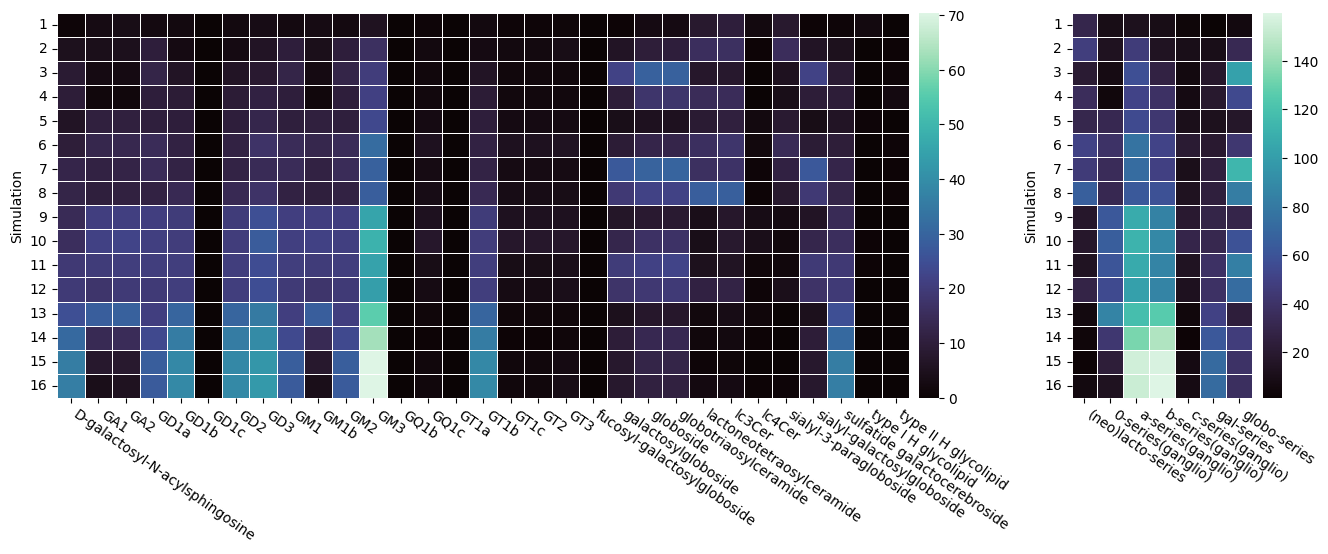

In [137]:
from matplotlib import gridspec
fig = plt.figure(figsize=(16,5))
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         wspace=0, width_ratios=[4.5, 1])
ax0 = fig.add_subplot(spec[0])
sns.heatmap(sims_lipid_df.groupby("Simulation").mean(),cmap='mako',linewidth=0.5,ax=ax0,cbar_kws={"pad": 0.01})
plt.yticks(rotation=0)
plt.xticks(rotation=-35,ha='left')
ax1 = fig.add_subplot(spec[1])
sns.heatmap(sims_series_df.groupby("Simulation").mean(),cmap='mako',linewidth=0.5,ax=ax1,cbar_kws={"pad": 0.05})
plt.yticks(rotation=0)
plt.xticks(rotation=-35,ha='left')
plt.show()

Pairwise examination of lipid series

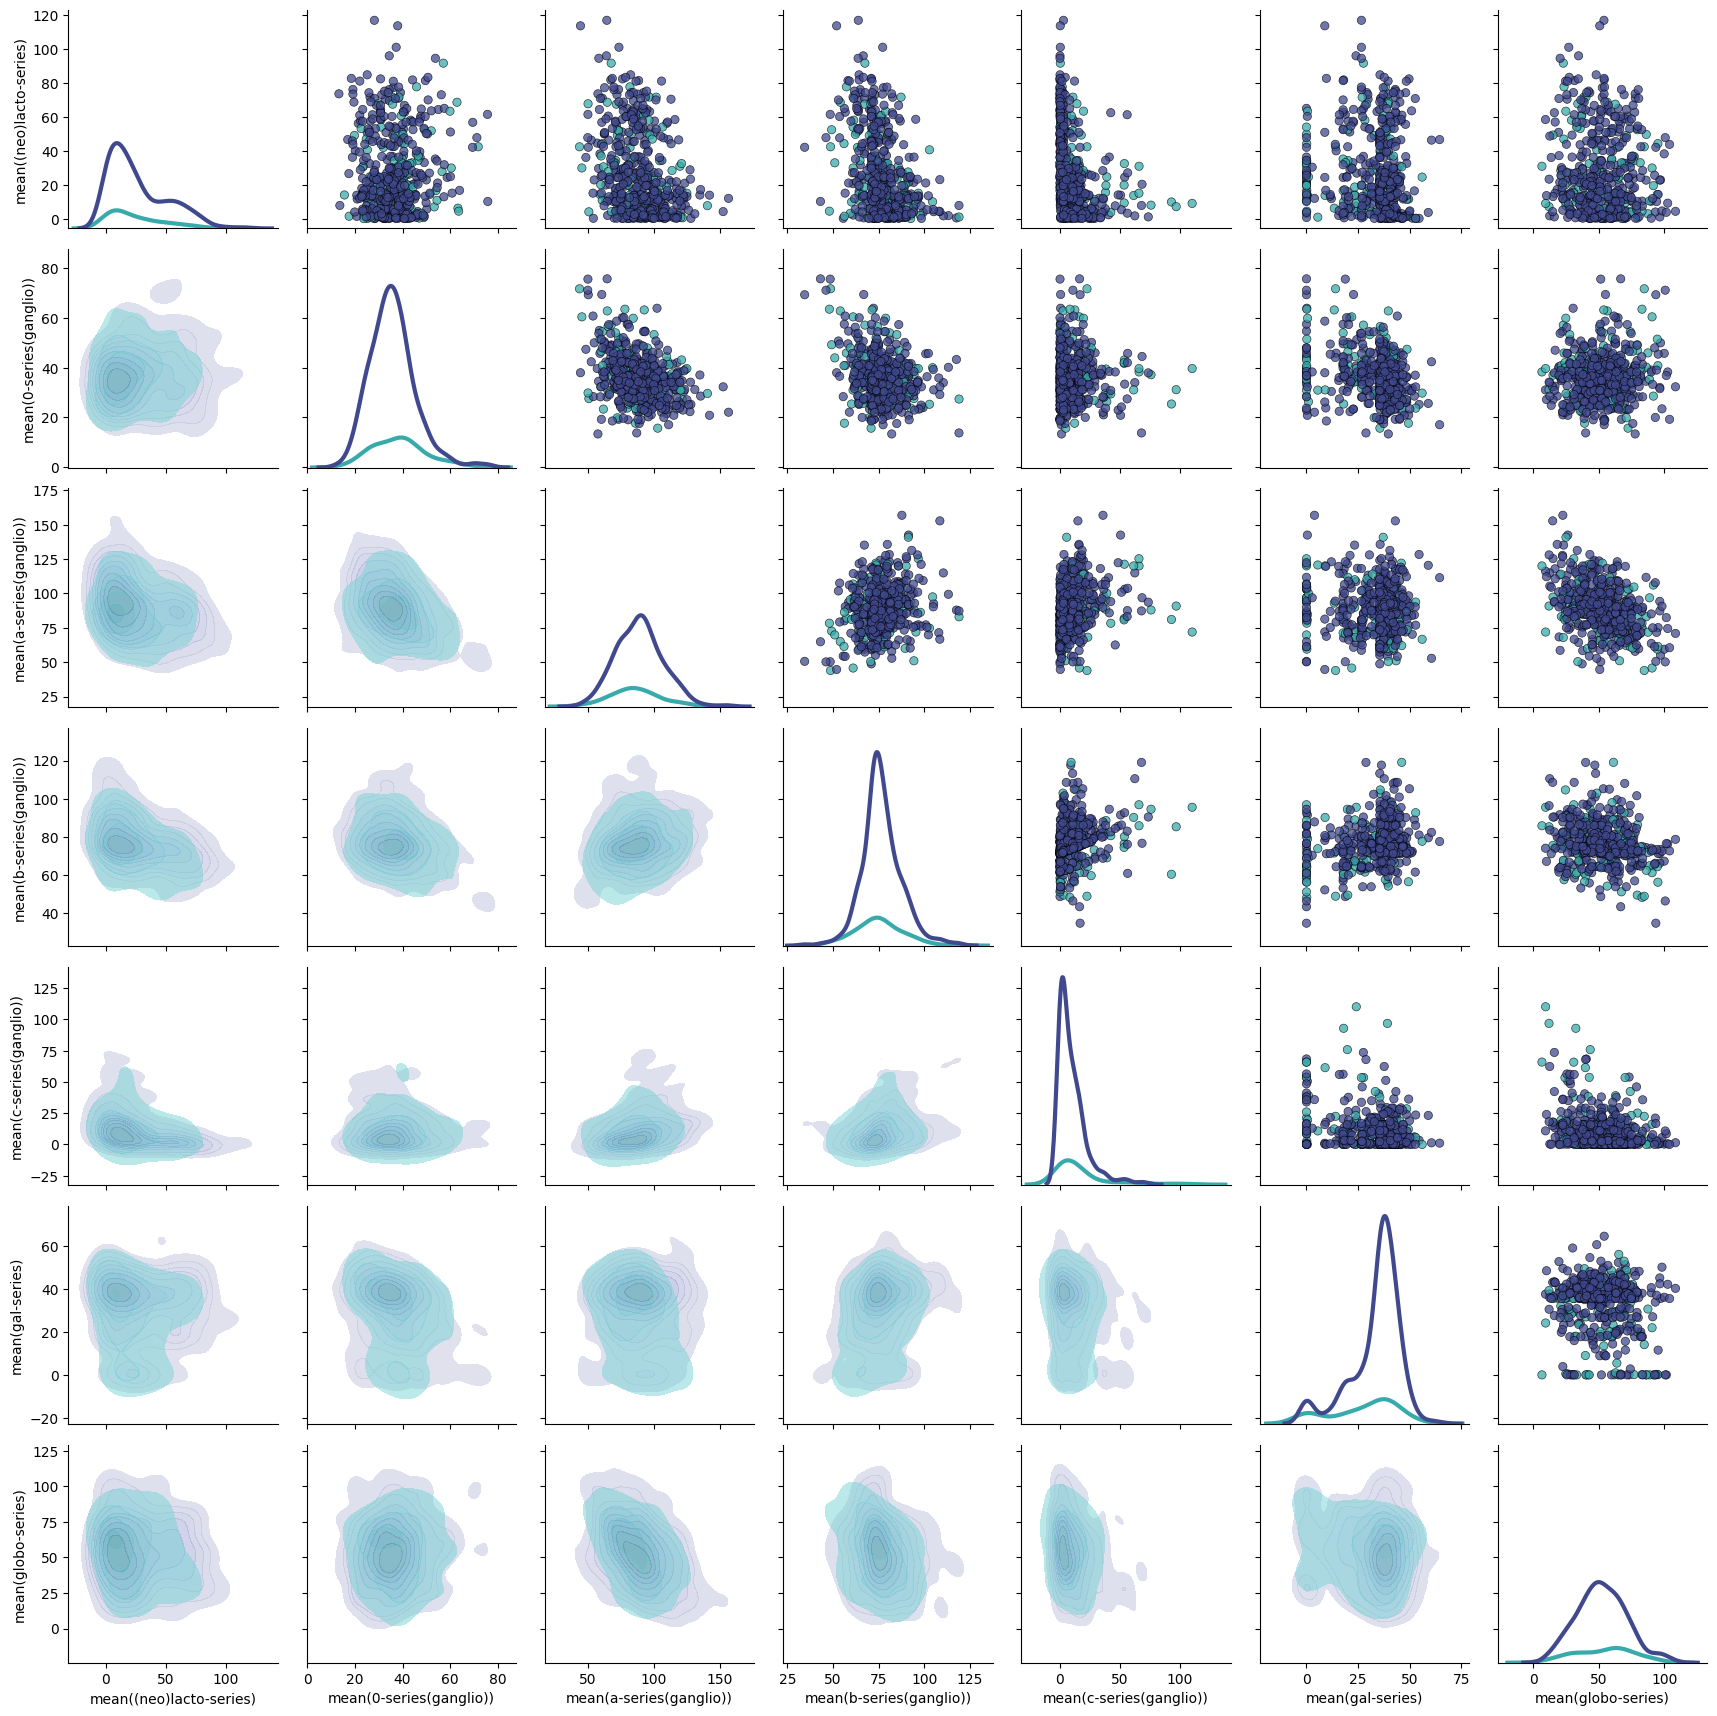

In [8]:
pairwise_cols = ["Srv",'mean((neo)lacto-series)','mean(0-series(ganglio))','mean(a-series(ganglio))','mean(b-series(ganglio))','mean(c-series(ganglio))',
            'mean(gal-series)','mean(globo-series)']
df_pairs = renamed_dict["avg_df"]
df_pairs = df_pairs[pairwise_cols]
g = sns.PairGrid(df_pairs,hue="Srv",palette='mako')
g.map_upper(sns.scatterplot, alpha=0.75, edgecolor="black")
g.map_lower(sns.kdeplot,fill=True,alpha=0.5)
g.map_diag(sns.kdeplot, lw=3, legend=False)

Saving Combined and Averaged Dataframes

In [9]:
# t_o_list = ['DSS','DSS.time','Srv','A4GALT_1','ABO_1','B3GALNT1_1','B3GALT1_1','B3GALT4_1',
#             'B3GALT5_1','B3GNT2_1','B3GNT3_1','B3GNT5_1','B4GALNT1_1','B4GALT5_1','B4GALT6_1','FUT1_1',
#             'FUT2_1','FUT3_1','FUT5_1','FUT6_1','FUT9_1','GAL3ST1_1','GCNT2_1','ST3GAL1_1','ST3GAL2_1',
#             'ST3GAL3_1','ST3GAL4_1','ST3GAL5_1','ST3GAL6_1','ST6GALNAC2_1','ST6GALNAC3_1','ST6GALNAC4_1',
#             'ST6GALNAC5_1','ST6GALNAC6_1','ST8SIA1_1','ST8SIA5_1','UGCG_1','UGT8_1']

# transcriptomic_only = renamed_dict["integrated_df_1"][t_o_list]
# transcriptomic_only.to_csv(f"./Tidied_Datasets/tidied_integrated_df_0.csv")

# for keys, df in renamed_dict.items():
#     df.to_csv(f"./Tidied_Datasets/tidied_{keys}.csv")

# renamed_dict["avg_df"].to_csv(f"./Tidied_Datasets/tidied_integrated_df_17.csv")
# renamed_dict["combined_df"].to_csv(f"./Tidied_Datasets/tidied_integrated_df_18.csv")